In [1]:
# Installing Libraries
# !pip install pandas

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Changing the Jupyter Notebook options
pd.set_option('display.max_columns', None)

## Loading the dataset

In [4]:
# Loading the data
df = pd.read_csv("loan.csv")

df.head()

/Users/mandeep.sachdeva/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Total number of rows and columns
df.shape

(39717, 111)

<br> <br>
## Cleaning the data
<ul> 
    <li> Removing Null values </li>
    <li> Removing too much unique values, as it will not help in the analysis </li>
    <li> Removing variables which are filled after loan is approved </li>
</ul>

#### Removing NULL values

In [6]:
# Check null values percentage for each column
print((df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [7]:
# Remove columns where more than 60% values are null
null_percentage = (df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending=False)


df.drop(null_percentage[null_percentage > 60].keys(), inplace=True, axis=1)

In [8]:
# Out of 111 columns, only 55 are left
df.shape

(39717, 54)

In [9]:
# Check null values again
print((df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [10]:
df.desc.head().tolist()

['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
 nan,
 "  Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",
 "  Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pa

In [11]:
df.shape

(39717, 54)

#### Removing too much unique values

In [12]:
# No. of unique values (in %)
(df.nunique().sort_values(ascending=False) / df.shape[0]) * 100

id                            100.000000
member_id                     100.000000
url                           100.000000
total_pymnt                    95.299242
total_pymnt_inv                94.463328
total_rec_int                  88.496110
last_pymnt_amnt                87.947227
emp_title                      72.563386
desc                           66.790040
revol_bal                      54.664250
title                          49.386912
installment                    38.731526
funded_amnt_inv                20.658660
total_rec_prncp                20.082081
annual_inc                     13.389732
recoveries                     10.171967
dti                             7.221089
collection_recovery_fee         6.586600
total_rec_late_fee              3.414155
out_prncp_inv                   2.865272
out_prncp                       2.862754
revol_util                      2.741899
funded_amnt                     2.621044
loan_amnt                       2.228265
zip_code        

In [13]:
# Too much of unique values will not do much in the analysis, hence dropping the columns having >60% of unique values
unique = (df.nunique().sort_values(ascending=False) / df.shape[0]) * 100
to_drop = unique[unique > 60].keys()

df.drop(to_drop, inplace=True, axis=1)
df.shape

(39717, 45)

#### Removing variables which are filled after loan is approved

In [14]:
# The columns which are filled after loan is approved is not needed for the analysis
df = df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_d','last_credit_pull_d','application_type', 'funded_amnt_inv'],axis=1)

# Removing title because as of now we are not dealing with text data
# df = df.drop(['title'],axis=1)

# Zip Code is masked, hence cannot be used
df = df.drop(['zip_code'],axis=1)

# Shape of the dataframe after removing columns
df.shape


(39717, 27)

In [15]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,initial_list_status,total_rec_late_fee,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,f,0.00,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,f,0.00,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,f,0.00,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,f,16.97,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,f,0.00,0.0,1,0,0.0,0,0.0,0.0


In [16]:
df.dtypes

loan_amnt                       int64
funded_amnt                     int64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
initial_list_status            object
total_rec_late_fee            float64
collections_12_mths_ex_med    float64
policy_code                     int64
acc_now_delinq                  int64
chargeoff_within_12_mths      float64
delinq_amnt                     int64
pub_rec_bankruptcies          float64
tax_liens   

<br><br>

## Pre processing
<ol>
    <li> Converting object to int datatypes for better analysis (Eg. 36 months -> 36) </li>
    <li> Filling NULL values wherever possible by mean / median / mode </li>
</ol>

#### Converting to number cols

In [17]:
# Function which fetches the number from text
# We will be using regex to get the number from string


def get_number(s):
    """
    Function to get the number from string
    """
    
    # This regex will get the int as well as float from strings
    regex_to_use = r"[-+]?(?:\d*\.*\d+)"
    try:
        to_return = float(re.findall(regex_to_use, s)[0])
    
    except:
        to_return = np.nan
    
    return to_return

In [18]:
# Testing the regex on various scenarios

print(get_number("36 months"))
print(get_number("10.1%"))
print(get_number("10+ years"))
print(get_number("10+ years"))
print(get_number("< 1 year"))

36.0
10.1
10.0
10.0
1.0


In [19]:
# new columns with numbers
cols_to_use = ["term", "emp_length", "int_rate"]

for col in cols_to_use:
    print(f"Changing: {col}")
    df[f"{col}_new"] = df[col].apply(get_number)
    
df.head()

Changing: term
Changing: emp_length
Changing: int_rate


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,initial_list_status,total_rec_late_fee,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_new,emp_length_new,int_rate_new
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,f,0.00,0.0,1,0,0.0,0,0.0,0.0,36.0,10.0,10.65
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,f,0.00,0.0,1,0,0.0,0,0.0,0.0,60.0,1.0,15.27
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,f,0.00,0.0,1,0,0.0,0,0.0,0.0,36.0,10.0,15.96
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,f,16.97,0.0,1,0,0.0,0,0.0,0.0,36.0,10.0,13.49
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,f,0.00,0.0,1,0,0.0,0,0.0,0.0,60.0,1.0,12.69


#### Filling NULL values

In [20]:
df.isnull().sum()

loan_amnt                        0
funded_amnt                      0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           11
addr_state                       0
dti                              0
initial_list_status              0
total_rec_late_fee               0
collections_12_mths_ex_med      56
policy_code                      0
acc_now_delinq                   0
chargeoff_within_12_mths        56
delinq_amnt                      0
pub_rec_bankruptcies           697
tax_liens                       39
term_new                         0
emp_length_new      

In [21]:
# Analyze the emp_length columns
df.emp_length_new.tolist()[:10]

[10.0, 1.0, 10.0, 10.0, 1.0, 3.0, 8.0, 9.0, 4.0, 1.0]

In [22]:
# Fill the emp_length null values with the mode 
df["emp_length_new"].fillna(df.emp_length_new.mode(), inplace=True)

(array([3.7339e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.6740e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

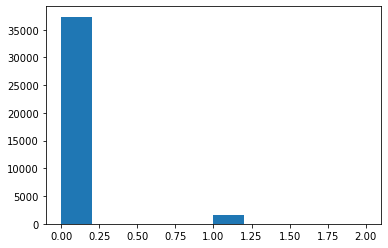

In [23]:
# Check pub_rec_bankruptcies column values
plt.hist(x="pub_rec_bankruptcies", data=df)

In [24]:
# Most of the values are 0, hence there is no use of it.
df.drop(["pub_rec_bankruptcies"], axis=1, inplace=True)

In [25]:
# Else the null values are not that much.. hence we can drop the rows
df.dropna(axis=0, inplace=True)

df.isnull().sum()


loan_amnt                     0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
initial_list_status           0
total_rec_late_fee            0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
tax_liens                     0
term_new                      0
emp_length_new                0
int_rate_new                  0
dtype: int64

In [26]:
df.shape

(38576, 29)

<br> <br>

## EDA

### Detecting Outliers

/Users/mandeep.sachdeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate_new'>

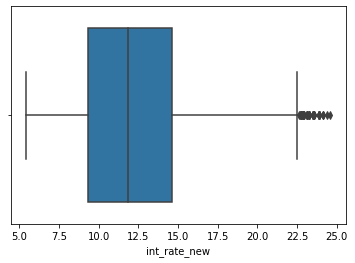

In [27]:
sns.boxplot(df.int_rate_new)

# We can see there are no outliers in the interest rate

/Users/mandeep.sachdeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

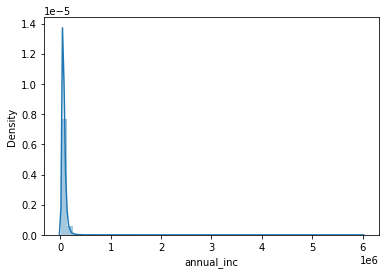

In [28]:
sns.distplot(df.annual_inc)

# here we can see the distribution is skewed, hence there are outliers

##### Removing the annual income outlier

/Users/mandeep.sachdeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

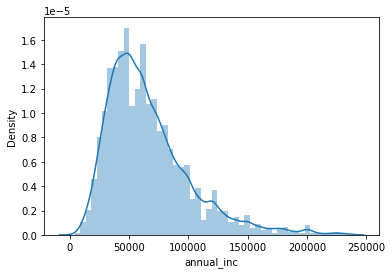

In [29]:
df = df[df.annual_inc<=np.percentile(df.annual_inc,99)]
sns.distplot(df.annual_inc)

#### Removing rows where loan_status = 'Current' (because we do not know whether they will pay full or not)

In [30]:
df = df[df.loan_status != "Current"]

<ul>
    <li>Distribution of <b>Annual Income</b> after removing the outlier

### Inferences

#### Effect of Employment length on Loan Status

Text(0.5, 1.0, 'Effect of Employment length on Loan Status¶')

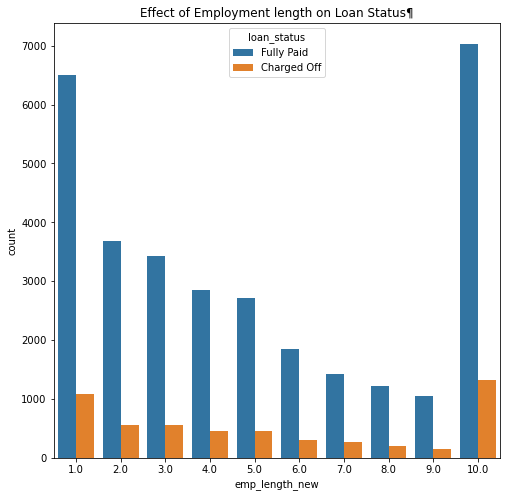

In [31]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df.emp_length_new, hue=df.loan_status)
plt.title("Effect of Employment length on Loan Status¶")

<ul>
    <li>Here we can see the emp_length is a factor for the <b>Charged Off</b> loans, if not that much. People having more than 10 years of experience tend not to pay the loans fully</li>
</ul>
<br>
<br>

In [32]:
# Charged Off data
charged_off = df[df["loan_status"] == "Charged Off"]
sns.set_style(style="white")

#### Effect of  on Loan Status on annual income

Text(0.5, 1.0, 'Effect of on Loan Status on annual income')

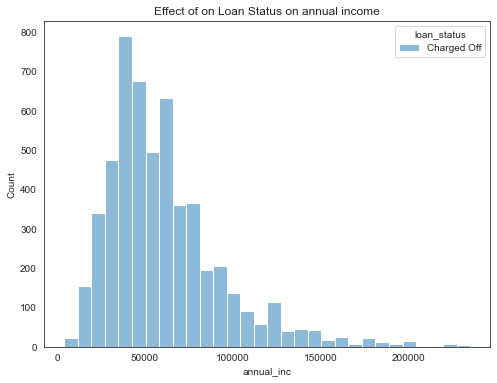

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=charged_off, x="annual_inc", hue="loan_status", bins=30)
plt.title("Effect of on Loan Status on annual income")

<ul>
    <li>Mostly the <b>annual income</b> of person's who are <b>defaulters</b> ranges from <b>30k to 60k</b>
</ul>
<br>
<br>

#### See the Loan amount vs Loan Status 

Text(0.5, 1.0, 'Loan amount vs Loan Status')

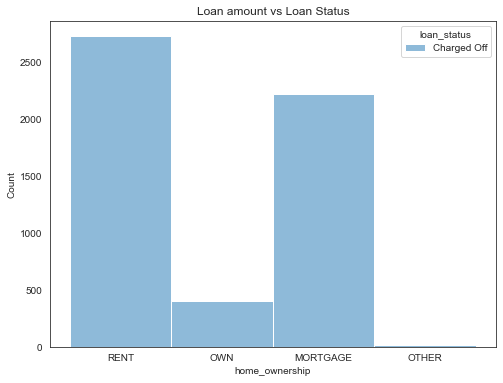

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=charged_off, x="home_ownership", hue="loan_status", bins=30)
plt.title("Loan amount vs Loan Status")

<ul>
    <li>If the payer does not own his/her own house, then there is a <b>high</b> chance that the loan will be Charged off
</ul>
<br>
<br>

Text(0.5, 1.0, 'Interest Rate for which loans are defaulted')

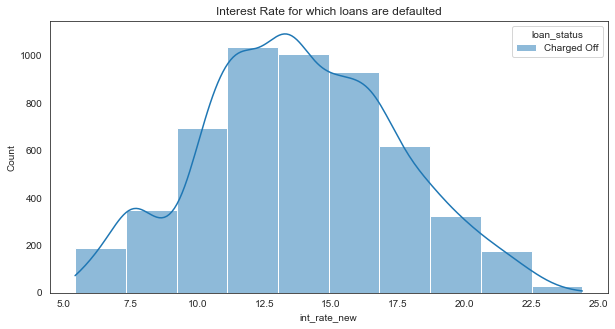

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(data=charged_off,x='int_rate_new',hue='loan_status', bins=10, kde=True)
plt.title("Interest Rate for which loans are defaulted")

<ul>
    <li>Interestingly, interest rate has a major effect on loan_status. Rates ranging from <b>11.0-16.0</b> have higher chance of getting defaulterz
</ul>
<br>
<br>

<AxesSubplot:xlabel='loan_amnt', ylabel='int_rate_new'>

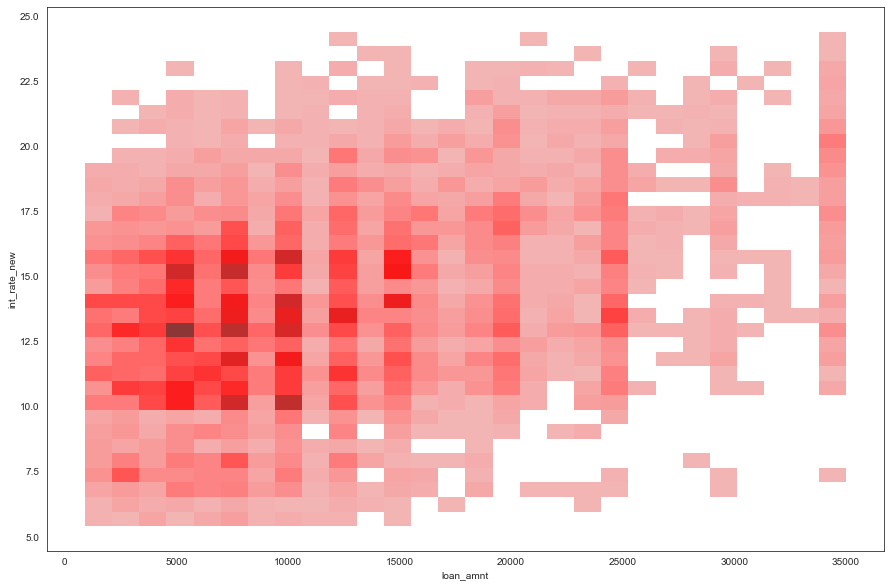

In [36]:
plt.figure(figsize=(15,10))
sns.histplot(data=charged_off, x="loan_amnt", y="int_rate_new",color='r')

The interesting part comes in where
<ul>
    <li>The loan amount which is<b> >5K and <14k </b> </li>
    <li>The interest rate<b> >10 and <16 </b> </li>
</ul>
Mostly the defaulterz lie in these regions
<br>
<br>

/Users/mandeep.sachdeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mandeep.sachdeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


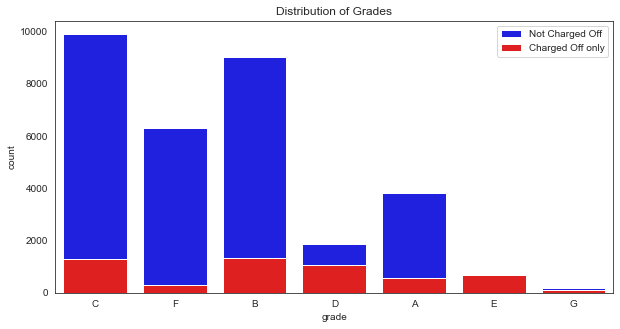

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df[df["loan_status"] != "Charged Off"].grade, color='b', label="Not Charged Off")
sns.countplot(charged_off.grade, color='r', label="Charged Off only")
plt.title('Distribution of Grades')
plt.legend()
plt.show()

<b> Inference: </b>
<ul>
    <li>Grade <b>E</b> is the most likely to be the loan defaulters.</li>
    <li>Grade <b>D</b> is also somewhat likely to be the defaulters.</li>
</ul>
<br><br>

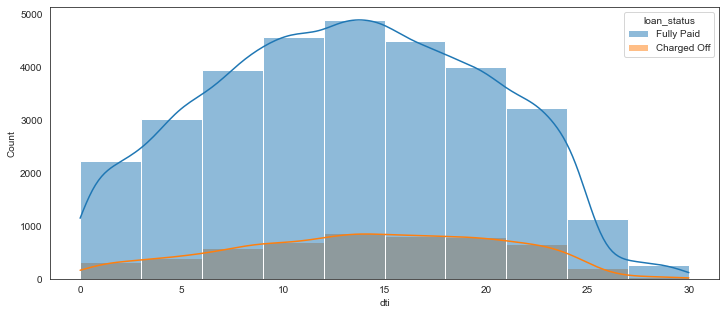

In [38]:
# Effect of dti on loan_status 
plt.figure(figsize=(12,5))
sns.histplot(data=df,x='dti',hue='loan_status',bins=10, kde=True)
plt.show()

#### It can be seen that the loans having dti value 10-15 have higher number of defaulterz. Also, higher the dti higher the chance of defaulting.
<br><br>

Text(0.5, 1.0, 'Effect of location on defaulters')

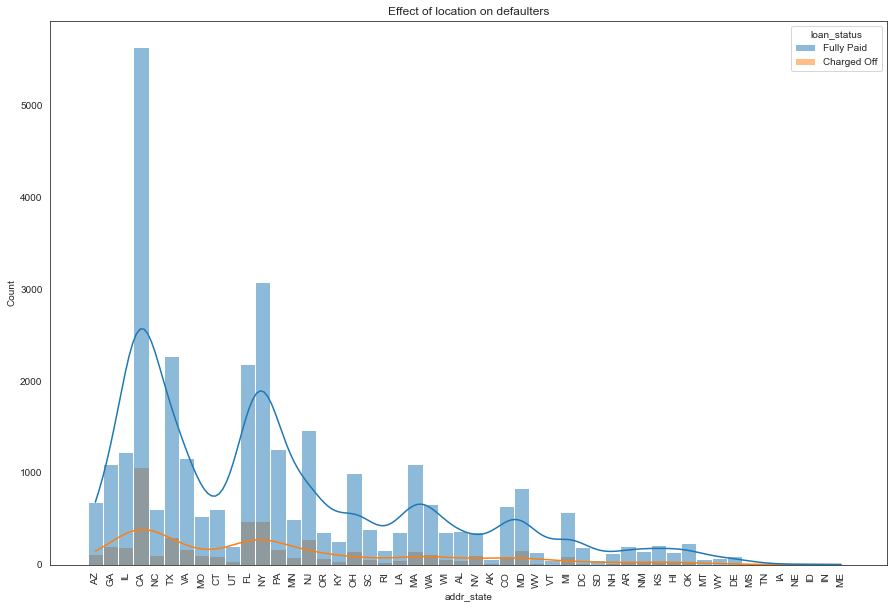

In [39]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
# Effect of location on defaulterz
sns.histplot(data=df, x='addr_state', hue="loan_status", kde="True")
plt.title("Effect of location on defaulters")

#### Loans from states like CA, FL and NY are more likely to be defaulters compared to other states
<br><br>

<AxesSubplot:xlabel='purpose', ylabel='Count'>

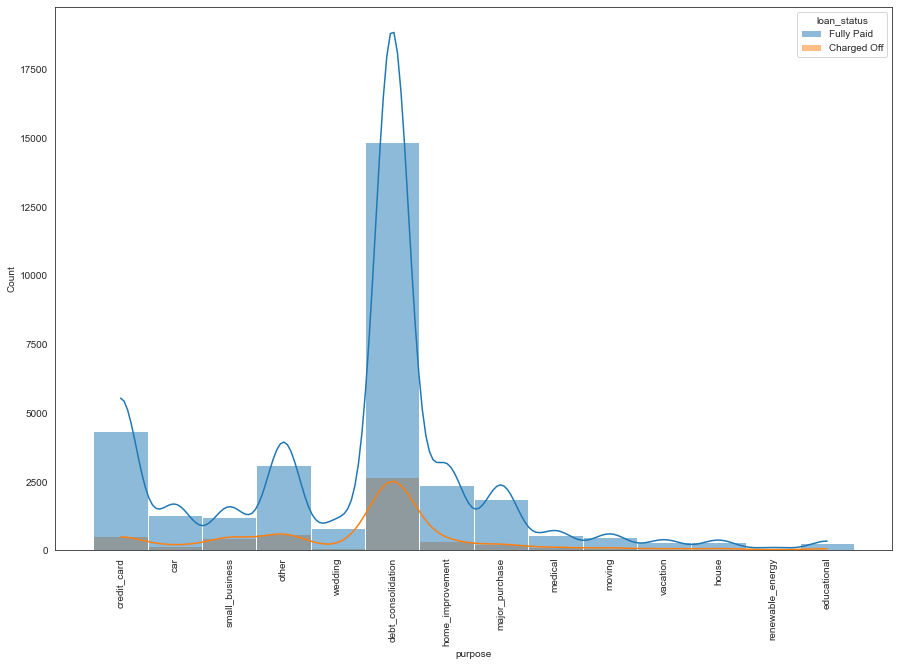

In [40]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
# Effect of location on defaulterz
sns.histplot(data=df, x='purpose', hue="loan_status", kde="True")

#### Low risk loans includes: car, wedding, medical, house. These loans are likely to be fully paid

<br><br>